In [3]:
import numpy as np
import pandas as pd
from statsmodels import regression, stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy as sp

def linreg(X,Y):
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(Y,x).fit()
    return model.params[0],model.params[1] # Return the coefficients of the linear model

#  작은 표본 크기로 인한 편향된 노이즈 (Biased Noise)

Slope: 0.009072503822685514 intercept: -0.4020774408530383


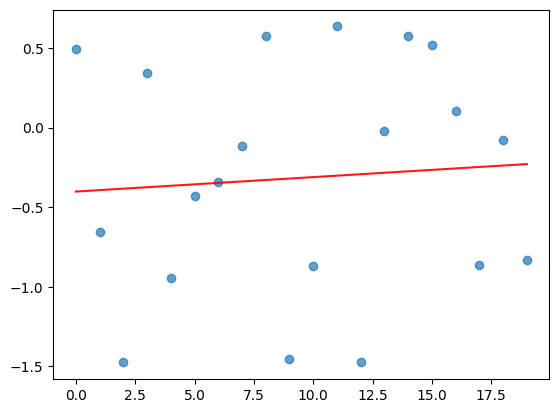

In [6]:
np.random.seed(107)
rand = np.random.randn(20)

xs = np.arange(20)
a,b = linreg(xs,rand)
print("Slope:",b,"intercept:",a)

plt.scatter(xs,rand,alpha=0.7)
Y_hat = xs * b + a
plt.plot(xs,Y_hat,'r',alpha=0.9);

<Axes: >

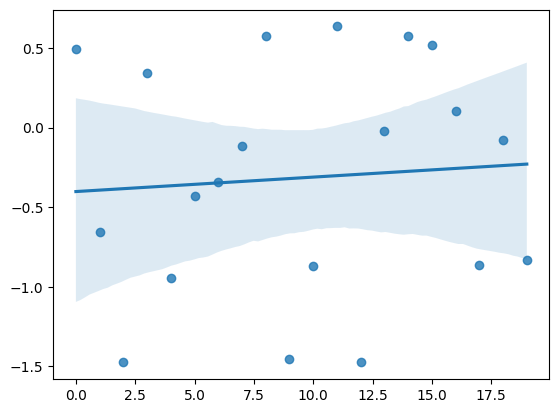

In [8]:
import seaborn

seaborn.regplot(x= xs,y = rand)

Slope: 0.0016618526722665848 intercept: -0.1785151197764879


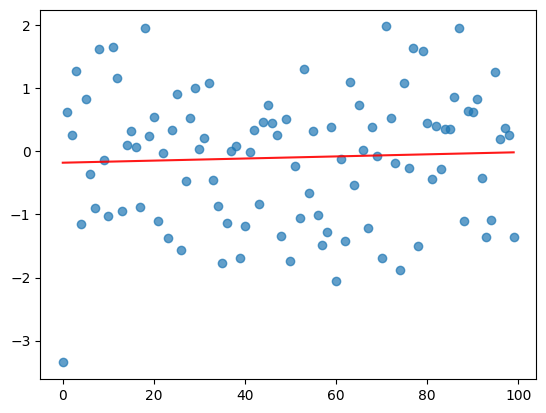

In [13]:
rand2 = np.random.randn(100)

xs2 = np.arange(100)
a2,b2 = linreg(xs2,rand2)
print('Slope:',b2,'intercept:',a2)

plt.scatter(xs2,rand2,alpha=0.7)
Y_hat2 = xs2 * b2 + a2
plt.plot(xs2,Y_hat2,'r',alpha=0.9);

# 체제 변화(Regime Change)의 영향과 대응

[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_16520\1845587343.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0],model.params[1] # Return the coefficients of the linear model


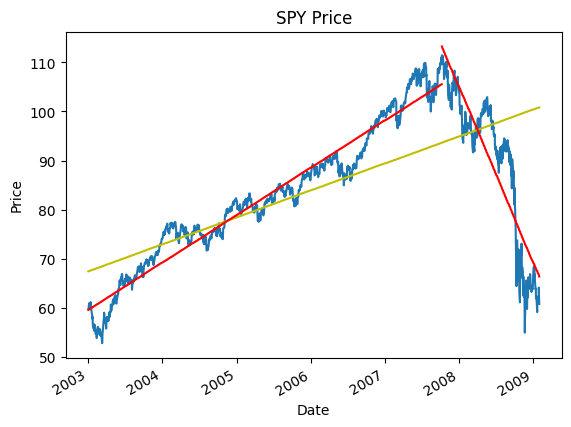

In [ ]:
import yfinance as yf

start = '2003-01-01'
end = '2009-02-01'
pricing = yf.download('SPY',start=start,end=end,auto_adjust=True)['Close']['SPY']

breakpoint= 1200  # 체제가 변하는 시점
xs = np.arange(len(pricing)) # 독립 변수 
xs2 = np.arange(breakpoint)
xs3 = np.arange(len(pricing)-breakpoint)

# Perform linear regressions on the full data set, the data up to the breakpoint, and the data after
a, b = linreg(xs, pricing) 
a2, b2 = linreg(xs2, pricing[:breakpoint])
a3, b3 = linreg(xs3, pricing[breakpoint:])

Y_hat = pd.Series(xs * b + a, index=pricing.index)
Y_hat2 = pd.Series(xs2 * b2 + a2, index=pricing.index[:breakpoint])
Y_hat3 = pd.Series(xs3 * b3 + a3, index=pricing.index[breakpoint:])

# Plot the raw data
pricing.plot()
Y_hat.plot(color='y')
Y_hat2.plot(color='r')
Y_hat3.plot(color='r')
plt.title('SPY Price')
plt.ylabel('Price');

In [15]:
stats.diagnostic.breaks_cusumolsresid(
    regression.linear_model.OLS(pricing, sm.add_constant(xs)).fit().resid)[1]

np.float64(8.332529426394946e-59)

# 다중공선성(Multicollinearity)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_16520\1643428040.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
C:\Users\USER\AppData\Local\Temp\ipykernel_16520\1643428040.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Constant:', mlr.params[0],'MLR beta to S&P 500:', mlr.params[1],'MLR beta to MDY',mlr.params[2])


Constant: -11.751735864638226 MLR beta to S&P 500: 0.2447405722580148 MLR beta to MDY 0.11086416162875434


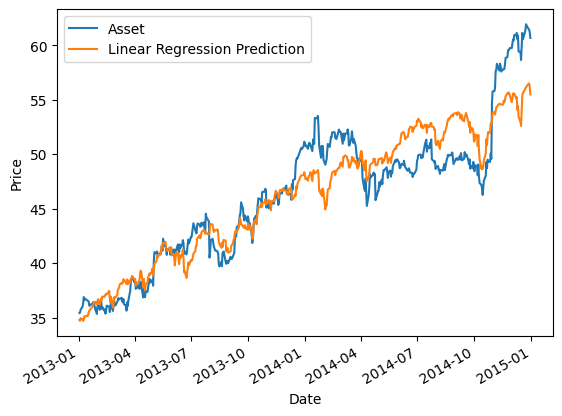

In [17]:
# Get pricing data for two benchmarks (stock indices) and a stock
start = '2013-01-01'
end = '2015-01-01'

b1 = yf.download('SPY',start=start,end=end,auto_adjust=True)['Close']['SPY']
b2 = yf.download('MDY',start=start,end=end,auto_adjust=True)['Close']['MDY']
asset = yf.download('V',start=start,end=end,auto_adjust=True)['Close']['V']

mlr = regression.linear_model.OLS(asset,sm.add_constant(np.column_stack((b1,b2)))).fit()
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
print('Constant:', mlr.params[0],'MLR beta to S&P 500:', mlr.params[1],'MLR beta to MDY',mlr.params[2])

asset.plot()
prediction.plot();
plt.ylabel('Price')
plt.legend(['Asset','Linear Regression Prediction']);

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_16520\1006708840.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
C:\Users\USER\AppData\Local\Temp\ipykernel_16520\1006708840.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Constant:', mlr.params[0],'MLR beta to S&P 500:', mlr.params[1],'MLR beta to MDY',mlr.params[2])


Constant: -21.77394232737976 MLR beta to S&P 500: 0.20338133566776156 MLR beta to MDY 0.1928080299599107


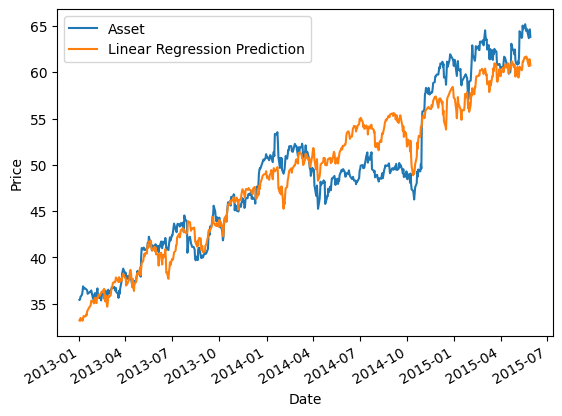

In [18]:
# Get pricing data for two benchmarks (stock indices) and a stock
start = '2013-01-01'
end = '2015-06-01'

b1 = yf.download('SPY',start=start,end=end,auto_adjust=True)['Close']['SPY']
b2 = yf.download('MDY',start=start,end=end,auto_adjust=True)['Close']['MDY']
asset = yf.download('V',start=start,end=end,auto_adjust=True)['Close']['V']

mlr = regression.linear_model.OLS(asset,sm.add_constant(np.column_stack((b1,b2)))).fit()
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
print('Constant:', mlr.params[0],'MLR beta to S&P 500:', mlr.params[1],'MLR beta to MDY',mlr.params[2])

asset.plot()
prediction.plot();
plt.ylabel('Price')
plt.legend(['Asset','Linear Regression Prediction']);

In [19]:
# Compute Pearson correlation coefficient
sp.stats.pearsonr(b1,b2)[0] # Second return value is p-value

np.float64(0.9898002474371115)